In [1]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing important Libraries
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

In [3]:
#To get the list of all files and directories in the specified directory.
data_labels = os.listdir("/content/drive/MyDrive/Drowsiness_dataset/train")

In [4]:
# Labels contain in our data
data_labels

['Closed', 'Open ']

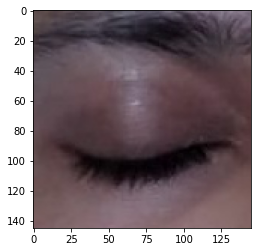

In [5]:
# Closed eye label image
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/Drowsiness_dataset/train/Closed/_0.jpg"))

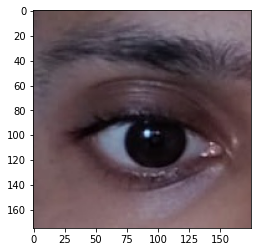

In [6]:
# Open eye label image
plt.imshow(plt.imread("/content/drive/MyDrive/Drowsiness_dataset/train/Open /_0.jpg"))

In [28]:
# Making an function to convert image into an array
def load_images(my_folder):
    imgs, targets = [], []
    for foldername in os.listdir(my_folder):
        loc = my_folder + "/" + foldername
        targets.append(len(os.listdir(loc)))
        for filename in os.listdir(loc):
            img = cv2.imread(os.path.join(loc, filename))
            img = cv2.resize(img, (86, 86))
            if img is not None and img.shape == (86, 86, 3):
                imgs.append(img)
        print(foldername)
    imgs = np.array(imgs)
    y = np.zeros(imgs.shape[0]).astype(int)
    j, n = 0, 0
    for i in targets:
        y[j:i + j] = n
        n += 1
        j = i + j
    return imgs, y

In [13]:
# Giving path of images
my_folder = "/content/drive/MyDrive/Drowsiness_dataset/train"
X, y = load_images(my_folder)

Closed
Open 


In [14]:
# Train-test Split
def train_test_split(X, y, testing_size=0.2):
    no_of_rows = X.shape[0]
    no_of_test_rows = int(no_of_rows * testing_size)
    rand_row_num = np.random.randint(0, no_of_rows, no_of_test_rows)

    X_test = np.array([X[i] for i in rand_row_num])
    X_train = np.delete(X, rand_row_num, axis=0)

    y_test = np.array([y[i] for i in rand_row_num])
    y_train = np.delete(y, rand_row_num, axis=0)

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = train_test_split(X, y, testing_size=0.2)
print(X_train[0].shape)


(86, 86, 3)


In [23]:
# CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Reshape

def define_model(kernel_size):

  CNN = Sequential()

  # first convolution layer
  # CONV 64 - 3 x 3 filters
  CNN.add(Conv2D(64, kernel_size = kernel_size,
                  activation='relu', input_shape=(86, 86, 3)))
  # MAXPOOLING 2 x 2
  CNN.add(MaxPooling2D(pool_size=(2, 2)))

  # second convolution layer
  # CONV 128 - 3 x 3 filters
  CNN.add(Conv2D(128, kernel_size=kernel_size,
                  activation='relu'))
  # MAXPOOLING 2 x 2
  CNN.add(MaxPooling2D(pool_size=(2, 2)))

  # # Reshape to 1d: Flatten
  CNN.add(Flatten())

  # Dense layer - 128 units
  CNN.add(Dense(128, activation='relu'))

  #output layer
  # Dense output Layer - 10 units
  CNN.add(Dense(2, activation='softmax'))

  CNN.summary()

  return CNN

In [24]:
# Model Summary
CNN = define_model((3, 3))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 84, 84, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [31]:
#Compile the model using 'adam' optimizer, loss function-Sparsecategorical_crossentropy and , metric - accuracy

CNN.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        optimizer=keras.optimizers.Adam(),
        metrics=['accuracy']
    )


In [26]:
# Model fit
batch_size = 32
max_epochs = 20
result = CNN.fit(x=X_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=max_epochs,
                   verbose=1,
                   validation_split=0.2)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 3.5963 - accuracy: 0.5714 - val_loss: 3339.0422 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 402ms/step - loss: 1257.7902 - accuracy: 0.5714 - val_loss: 976.6403 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 399ms/step - loss: 362.2566 - accuracy: 0.5714 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 401ms/step - loss: 99.0344 - accuracy: 0.4286 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 389ms/step - loss: 69.4523 - accuracy: 0.4286 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 399ms/step - loss: 1.6489 - accuracy: 0.6429 - val_loss: 68.0224 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 388ms/step - loss: 19.7657 - accuracy: 0.5714 - val_loss: 23.9023 - val_a

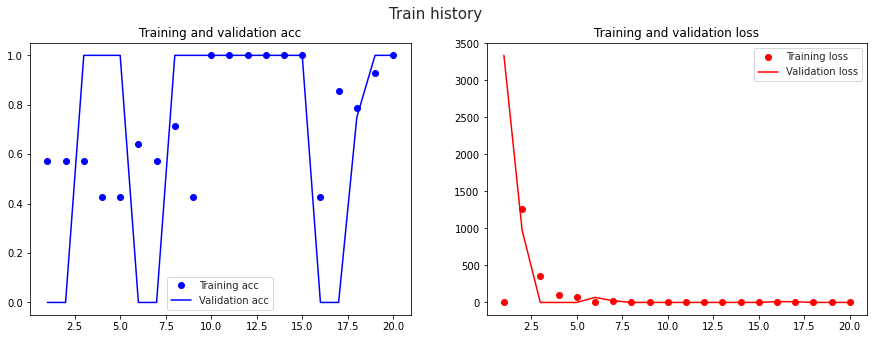

In [27]:
# Visualize the result
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("white")
plt.suptitle('Train history', size = 15)

ax1.plot(epochs, acc, "bo", label = "Training acc")
ax1.plot(epochs, val_acc, "b", label = "Validation acc")
ax1.set_title("Training and validation acc")
ax1.legend()

ax2.plot(epochs, loss, "bo", label = "Training loss", color = 'red')
ax2.plot(epochs, val_loss, "b", label = "Validation loss", color = 'red')
ax2.set_title("Training and validation loss")
ax2.legend()

plt.show()